In [1]:
# The source code is to predict the real estate price from several attributes. 
import pandas as pd

In [2]:
df = pd.read_csv("real_estate_dataset.csv")

In [53]:
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


<AxesSubplot:xlabel='No', ylabel='Y house price of unit area'>

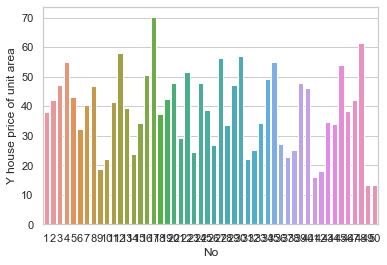

In [52]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(x="No", y="Y house price of unit area", data=df.head(50))

In [3]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
df.count()

No                                        414
X1 transaction date                       414
X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64

In [5]:
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(df, test_size=0.2)

In [8]:
y_train = train["Y house price of unit area"]
y_train.head(5)

352    25.7
215    48.1
95     51.8
32     34.2
25     27.0
Name: Y house price of unit area, dtype: float64

In [27]:
x_train = train.iloc[:, [1,2,3,4,5,6]]
x_train.head(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
352,2012.833,18.4,2674.9610,3,24.96143,121.50827
215,2013.333,19.2,383.7129,8,24.97200,121.54477
95,2012.917,8.0,104.8101,5,24.96674,121.54067
32,2012.750,37.9,488.5727,1,24.97349,121.53451
25,2013.083,29.3,1487.8680,2,24.97542,121.51726


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
# Training
reg = LinearRegression().fit(x_train, y_train)
reg2 = LinearRegression(normalize=True).fit(x_train, y_train)

In [30]:
print(reg.coef_)
print(reg2.coef_)

[ 4.29866579e+00 -2.93321960e-01 -4.92974046e-03  9.46791046e-01
  2.63095390e+02 -1.55412384e+01]
[ 4.29866579e+00 -2.93321960e-01 -4.92974046e-03  9.46791046e-01
  2.63095390e+02 -1.55412384e+01]


In [31]:
print(reg.intercept_)
print(reg2.intercept_)

-13289.564591851327
-13289.564591851333


In [32]:
print(reg.rank_)
print(reg2.rank_)

6
6


In [33]:
print(reg.singular_)
print(reg2.singular_)

[2.23028156e+04 2.10003381e+02 4.18406853e+01 5.15356729e+00
 1.87828328e-01 1.61016024e-01]
[1.62328456 1.01655153 1.00145431 0.7888362  0.73855022 0.40117392]


In [34]:
for i in reg.get_params():
    print(i)

copy_X
fit_intercept
n_jobs
normalize


In [35]:
x_test = test.iloc[:, [1,2,3,4,5,6]].head(5)
x_test

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
4,2012.833,5.0,390.5684,5,24.97937,121.54245
260,2013.250,17.0,1485.0970,4,24.97073,121.51700
370,2012.750,15.9,289.3248,5,24.98203,121.54348
356,2012.833,10.3,211.4473,1,24.97417,121.52999
167,2013.417,28.2,330.0854,8,24.97408,121.54011


In [18]:
print(reg.predict(x_test))
print(reg2.predict(x_test))

[47.31062632 37.36315381 44.93955863 41.67742408 44.79910818]
[47.31062632 37.36315381 44.93955863 41.67742408 44.79910818]


In [38]:
print(reg.score(x_train, y_train))
print(reg2.score(x_train, y_train))

0.5832944657770003
0.5832944657770118


In [36]:
result = reg.predict(x_test)

In [37]:
result

array([47.31062632, 37.36315381, 44.93955863, 41.67742408, 44.79910818])